In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv"
df = pd.read_csv(url)
df


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
new_column_names = {
    '1': 'Id',
    '1.52101': 'RI',
    '13.64': 'Na',
    '4.49': 'Mg',
    '1.10': 'Al',
    '71.78': 'Si',
    '0.06': 'K',
    '8.75': 'Ca',
    '0.00': 'Ba',
    '0.00.1': 'Fe',
    '1.1': 'Type'
}
df.rename(columns=new_column_names, inplace=True)


In [4]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
df.shape

(213, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      213 non-null    int64  
 1   RI      213 non-null    float64
 2   Na      213 non-null    float64
 3   Mg      213 non-null    float64
 4   Al      213 non-null    float64
 5   Si      213 non-null    float64
 6   K       213 non-null    float64
 7   Ca      213 non-null    float64
 8   Ba      213 non-null    float64
 9   Fe      213 non-null    float64
 10  Type    213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [22]:
df = df.drop('Id', axis=1)
print(df.head())


        RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1


In [23]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: xlabel='RI', ylabel='Na'>

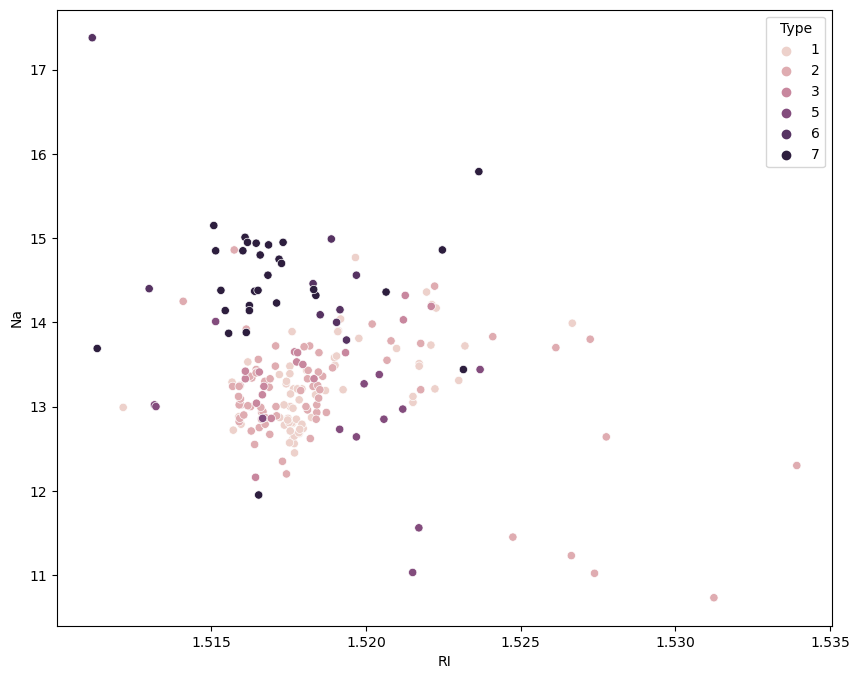

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='RI',y='Na',hue='Type',data=df)

Na is an important feature for glass type.
Ri distribution does not provide much insight.

<Axes: xlabel='Mg', ylabel='Al'>

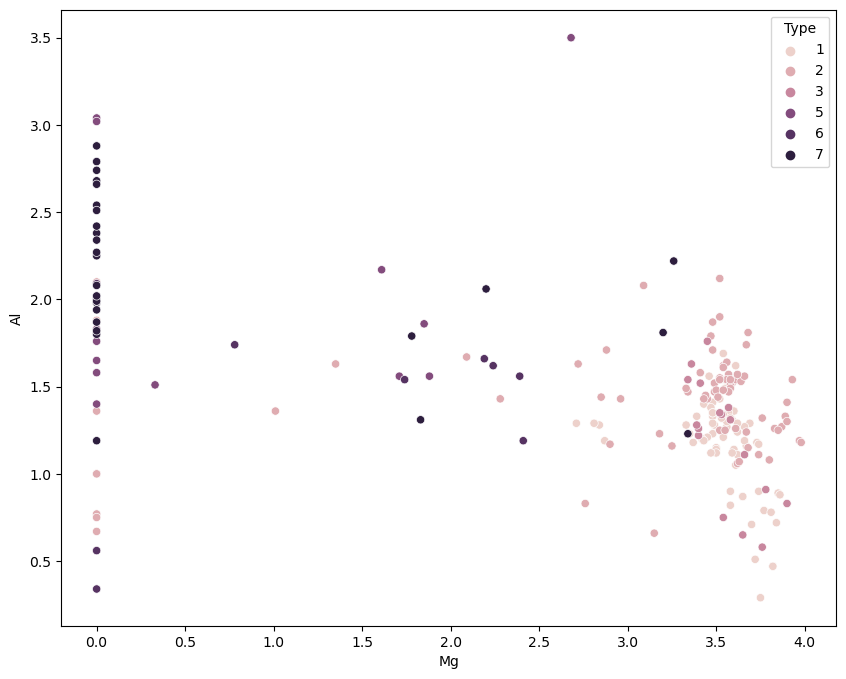

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Mg',y='Al',hue='Type',data=df)


Glass types of higher classification exhibit reduced levels of mag

<Axes: xlabel='Si', ylabel='K'>

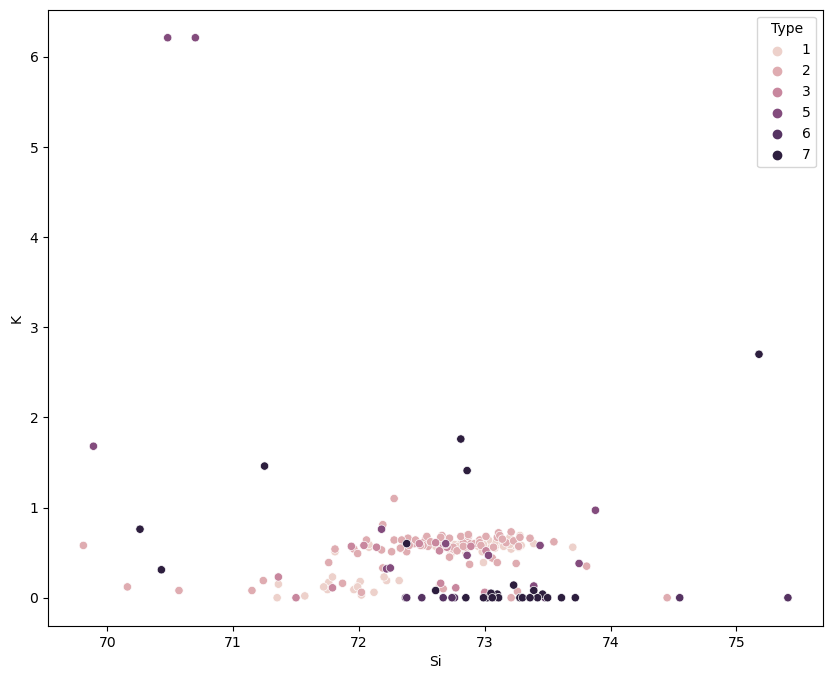

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Si',y='K',hue='Type',data=df)

Silicon (Si) plays a moderately significant role in determining the type of glass.

All glass types demonstrate lower values of potassium (K).






<Axes: xlabel='Ca', ylabel='Ba'>

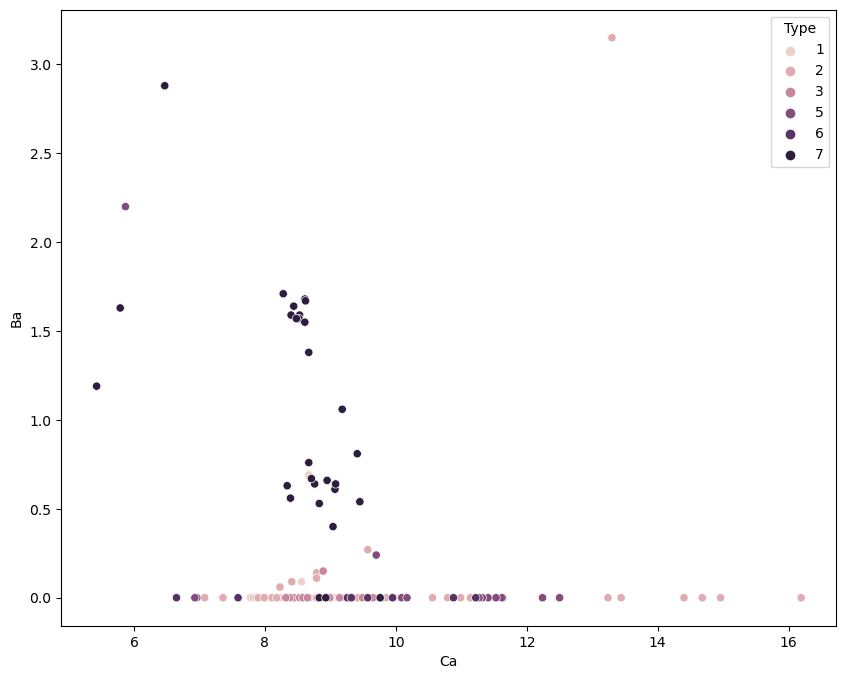

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ca',y='Ba',hue='Type',data=df)

Glass types with higher classification typically exhibit elevated levels of Barium (Ba).

Calcium (Ca) plays a moderate role in identifying the glass type.






<Axes: xlabel='Al', ylabel='Ca'>

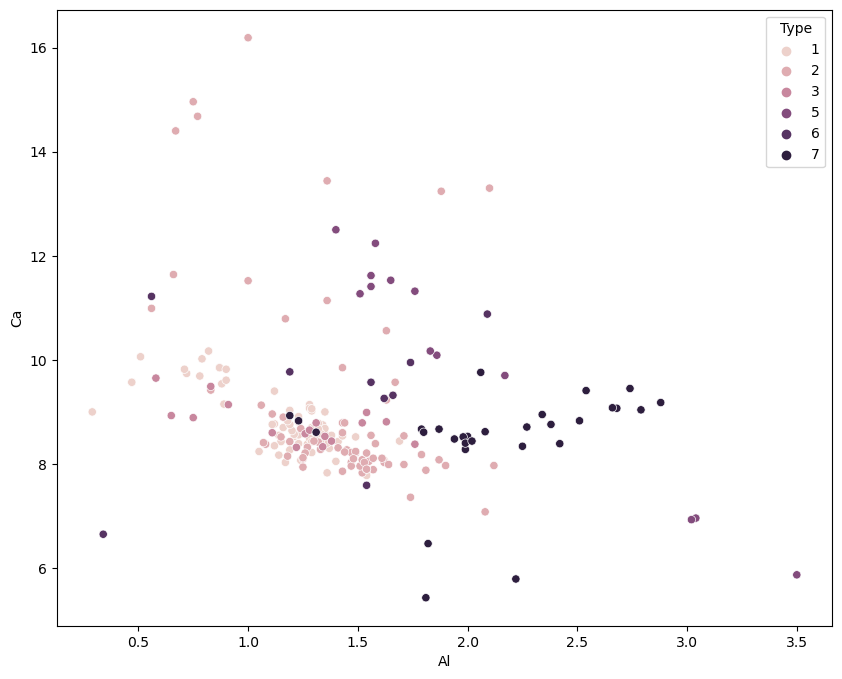

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Al',y='Ca',hue='Type',data=df)

Aluminum (Al) plays a crucial role in determining the glass type.

In [29]:
corr = df.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


Sodium (Na), Aluminum (Al), Magnesium (Mg), and Barium (Ba) contribute to the identification of glass types.

Potassium (K) and Calcium (Ca) do not offer substantial insights into glass types.

<Axes: >

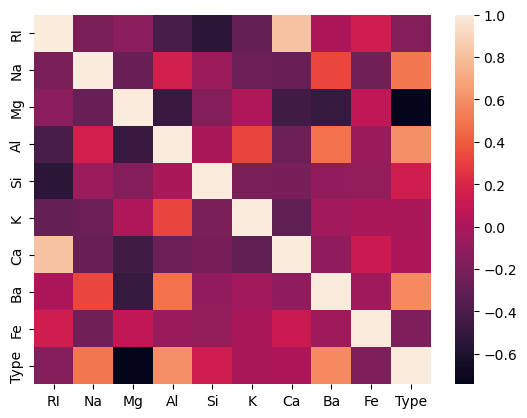

In [30]:
sns.heatmap(corr)

We can notice that Ca and K values don't affect Type that much.

Also Ca and RI are highly correlated, this means using only RI is enough.

So we can go ahead and drop Ca, and also K

In [31]:
DF= df.iloc[:,0:9]

In [32]:
DF

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [33]:
array= DF.values

In [34]:
array

array([[ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       [ 1.51766, 13.21   ,  3.69   , ...,  8.22   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [37]:
X

array([[-0.2451006 ,  0.59188032,  0.64293659, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-0.71682556,  0.15094587,  0.60814353, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-0.22860672, -0.24099586,  0.7055641 , ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 0.75772729,  1.16754474, -1.8621639 , ..., -0.36395239,
         2.94550057, -0.58830108],
       [-0.60796596,  1.19204109, -1.8621639 , ..., -0.33584439,
         2.80467644, -0.58830108],
       [-0.4100394 ,  1.00831841, -1.8621639 , ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [38]:
df_knn = pd.DataFrame(X,columns=df.columns[:-1])

In [39]:
df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.245101,0.591880,0.642937,-0.173500,0.097091,-0.029329,-0.792599,-0.353808,-0.588301
1,-0.716826,0.150946,0.608144,0.187433,0.433777,-0.167472,-0.827734,-0.353808,-0.588301
2,-0.228607,-0.240996,0.705564,-0.313863,-0.058303,0.108813,-0.518546,-0.353808,-0.588301
3,-0.307777,-0.167507,0.656854,-0.414122,0.550322,0.078115,-0.623951,-0.353808,-0.588301
4,-0.789399,-0.755419,0.649895,0.347848,0.407878,0.216258,-0.623951,-0.353808,2.082200
...,...,...,...,...,...,...,...,...,...
208,-0.700332,0.898085,-1.862164,2.874379,-0.058303,-0.643296,0.156046,1.778672,-0.588301
209,-0.495808,1.853443,-1.862164,1.089766,0.524423,-0.766090,-0.392060,2.844912,-0.588301
210,0.757727,1.167545,-1.862164,1.149921,0.990604,-0.766090,-0.363952,2.945501,-0.588301
211,-0.607966,1.192041,-1.862164,0.989506,1.236644,-0.766090,-0.335844,2.804676,-0.588301


In [40]:
x= df_knn
y= df['Type']

In [41]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.245101,0.591880,0.642937,-0.173500,0.097091,-0.029329,-0.792599,-0.353808,-0.588301
1,-0.716826,0.150946,0.608144,0.187433,0.433777,-0.167472,-0.827734,-0.353808,-0.588301
2,-0.228607,-0.240996,0.705564,-0.313863,-0.058303,0.108813,-0.518546,-0.353808,-0.588301
3,-0.307777,-0.167507,0.656854,-0.414122,0.550322,0.078115,-0.623951,-0.353808,-0.588301
4,-0.789399,-0.755419,0.649895,0.347848,0.407878,0.216258,-0.623951,-0.353808,2.082200
...,...,...,...,...,...,...,...,...,...
208,-0.700332,0.898085,-1.862164,2.874379,-0.058303,-0.643296,0.156046,1.778672,-0.588301
209,-0.495808,1.853443,-1.862164,1.089766,0.524423,-0.766090,-0.392060,2.844912,-0.588301
210,0.757727,1.167545,-1.862164,1.149921,0.990604,-0.766090,-0.363952,2.945501,-0.588301
211,-0.607966,1.192041,-1.862164,0.989506,1.236644,-0.766090,-0.335844,2.804676,-0.588301


In [42]:
y

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type, Length: 213, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=45)

In [46]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
185,0.008905,1.118552,0.406344,1.550958,-1.819430,1.474890,-2.226107,2.925383,-0.588301
202,-0.584875,1.706465,-1.862164,1.089766,0.589170,-0.766090,-0.476384,3.086325,-0.588301
210,0.757727,1.167545,-1.862164,1.149921,0.990604,-0.766090,-0.363952,2.945501,-0.588301
72,-0.673941,-0.081770,0.622061,0.247588,0.278383,0.170210,-0.750437,-0.353808,-0.588301
58,-0.268192,-0.020529,0.684688,-0.514381,0.174787,0.108813,-0.483411,-0.353808,0.541526
...,...,...,...,...,...,...,...,...,...
32,-0.271491,-1.024879,0.552475,-0.133397,0.951755,0.154861,-0.286655,-0.353808,0.027968
124,0.121064,-0.583945,0.684688,0.227537,-0.187798,0.124163,-0.286655,-0.353808,0.644238
131,-0.073564,0.028464,0.907364,-0.534433,-0.213697,0.124163,-0.567735,-0.353808,-0.588301
158,-0.129643,0.114201,0.475930,0.367899,-0.925917,0.108813,-0.103953,-0.353808,0.336103


In [47]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
83,-1.406270,1.032815,0.288047,1.270232,-0.485635,0.922320,-1.319624,-0.353808,-0.588301
62,1.292129,0.934829,0.789067,-1.336507,-1.689936,-0.766090,0.514423,-0.353808,-0.588301
84,-0.693734,-0.057273,0.629019,0.087174,0.084141,-0.075377,-0.525573,-0.353808,-0.588301
137,-0.532094,-0.755419,0.587268,0.187433,0.912907,0.246956,-0.743410,-0.353808,-0.588301
187,1.358105,1.779954,-0.331269,1.230129,-3.101427,0.400448,0.563612,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
115,-0.020784,-0.204251,0.851695,-0.073241,-0.420888,0.078115,-0.455303,-0.353808,0.438815
4,-0.789399,-0.755419,0.649895,0.347848,0.407878,0.216258,-0.623951,-0.353808,2.082200
28,-0.169229,-0.400222,0.566392,-0.333915,0.265434,0.154861,-0.328817,-0.353808,-0.588301
113,0.038594,-0.375726,0.900405,-0.514381,-0.278444,0.154861,-0.370979,-0.353808,-0.588301


In [48]:
y_train

185    7
202    7
210    7
72     2
58     1
      ..
32     1
124    2
131    2
158    3
203    7
Name: Type, Length: 149, dtype: int64

In [49]:
y_test

83     2
62     1
84     2
137    2
187    7
      ..
115    2
4      1
28     1
113    2
125    2
Name: Type, Length: 64, dtype: int64

In [52]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    28
2    25
7     7
5     2
3     2
dtype: int64

In [54]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,7
Type,,,,,
1,15,4,0,0,0
2,6,19,2,1,0
3,6,2,0,0,0
7,1,0,0,1,7


In [57]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 64.0625


In [58]:
model.score(x_train,y_train)

0.825503355704698

In [59]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.54      0.79      0.64        19
           2       0.76      0.68      0.72        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.64        64
   macro avg       0.46      0.45      0.45        64
weighted avg       0.63      0.64      0.63        64



In [61]:
random_data = np.random.rand(1, 9)


model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)


predicted_type = model.predict(random_data)

print("Predicted glass type:", predicted_type)

Predicted glass type: [2]
